In [24]:
import pandas as pd
import numpy as np
from efficient_apriori import apriori
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset = pd.read_csv("bread basket.csv")  # dataset
data = dataset.drop(['date_time', 'period_day', 'weekday_weekend'], axis=1)
data.head(20)

Transaction           Item
0             1          Bread
1             2   Scandinavian
2             2   Scandinavian
3             3  Hot chocolate
4             3            Jam
5             3        Cookies
6             4         Muffin
7             5         Coffee
8             5         Pastry
9             5          Bread
10            6      Medialuna
11            6         Pastry
12            6         Muffin
13            7      Medialuna
14            7         Pastry
15            7         Coffee
16            7            Tea
17            8         Pastry
18            8          Bread
19            9          Bread

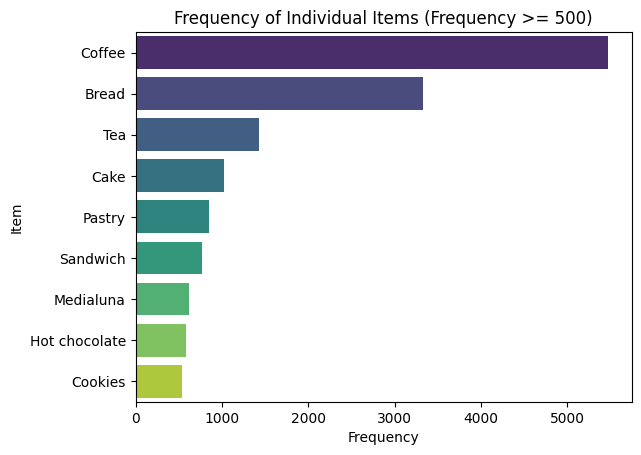

In [25]:
item_frequency = data['Item'].value_counts().sort_values(ascending=False)

# Filter out items with frequency less than 500
item_frequency_filtered = item_frequency[item_frequency >= 500]

sns.barplot(x=item_frequency_filtered.values, y=item_frequency_filtered.index, palette='viridis')
plt.title('Frequency of Items (Frequency >= 500)')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()


In [14]:
from sklearn.ensemble import IsolationForest

# Assuming 'Transaction' represents individual transactions and 'Item' represents the items purchased

# Feature Engineering
transaction_item_count = data.groupby('Transaction')['Item'].count().reset_index()
X = transaction_item_count[['Item']]

# Train Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate
model.fit(X)

# Predict anomalies
anomalies = model.predict(X)

# Identify anomalous transactions
anomalous_transactions = transaction_item_count[anomalies == -1]

print("Anomalous Transactions:")
print(anomalous_transactions)


/home/amir/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalous Transactions:
      Transaction  Item
376           382     7
474           482     8
1484         1514     7
2119         2162     8
2147         2190     7
...           ...   ...
9172         9378     7
9183         9389     7
9241         9447    10
9283         9492     8
9323         9534     9

[72 rows x 2 columns]


In [16]:
!pip install scikit-surprise


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3164179 sha256=e96e33832878f1c60a4cb0d9c3b1d4c17c57c90b5a2cdd38980640e03838bd4f
  Stored in directory: /home/amir/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce t

In [20]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Assuming 'Transaction' represents individual transactions and 'Item' represents the items purchased

# Convert transactions to binary ratings (1 for purchase, 0 for no purchase)
data['Rating'] = 1

# Load data into Surprise format
reader = Reader(rating_scale=(0, 1))  # Ratings are binary (purchase or no purchase)
data_surprise = Dataset.load_from_df(data[['Transaction', 'Item', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model (optional)
from surprise import accuracy
accuracy.rmse(predictions)

# Recommend items for a given user (Transaction)
user_id = 3
items_to_recommend = []
for item_id in data['Item'].unique():
    if model.predict(user_id, item_id).est > 0.5:  # Threshold for recommending an item
        items_to_recommend.append(item_id)

print("Items to Recommend for User {}: {}".format(user_id, items_to_recommend))


RMSE: 0.0230
Items to Recommend for User 3: ['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies', 'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata', 'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies', 'Cake', 'Mighty Protein', 'Chicken sand', 'Coke', 'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs', 'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola', 'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray', 'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles', 'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings', 'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta', 'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell', 'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie', 'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 'Gingerbread syrup', 'Panatone', 'Brioche and salami', 'Afte

In [14]:
df = pd.DataFrame(data, columns=["Item"]) 
df["incident_count"] = 1 
df_table = df.groupby("Item").sum().sort_values("incident_count", ascending=False).reset_index()
#  Initial Visualizations
df_table.head(5).style.background_gradient(cmap='Greens')

In [26]:
df_table["all"] = "Top 10 items" 
# creating tree map using plotly
fig = px.treemap(df_table.head(10), path=['all', "Item"], values='incident_count',)
fig.show()

In [35]:
from mlxtend.frequent_patterns import association_rules, apriori

onehot = data.pivot_table(index='Transaction', columns='Item', aggfunc=len)
onehot = onehot>0
frequent_itemsets = apriori(onehot, min_support = 0.01,  use_colnames=True)
rules = association_rules(frequent_itemsets, min_threshold=0.01) # compute association rules
rules.head(10)

antecedents  consequents  antecedent support  consequent support   support  \
0      (Bread)  (Alfajores)            0.327205            0.036344  0.010354   
1  (Alfajores)      (Bread)            0.036344            0.327205  0.010354   
2     (Coffee)  (Alfajores)            0.478394            0.036344  0.019651   
3  (Alfajores)     (Coffee)            0.036344            0.478394  0.019651   
4    (Brownie)      (Bread)            0.040042            0.327205  0.010777   
5      (Bread)    (Brownie)            0.327205            0.040042  0.010777   
6       (Cake)      (Bread)            0.103856            0.327205  0.023349   
7      (Bread)       (Cake)            0.327205            0.103856  0.023349   
8     (Coffee)      (Bread)            0.478394            0.327205  0.090016   
9      (Bread)     (Coffee)            0.327205            0.478394  0.090016   

   confidence      lift  leverage  conviction  
0    0.031644  0.870657 -0.001538    0.995145  
1    0.284884  0.870657 -0.001538    0.940818  
2    0.041078  1.130235  0.002264    1.004936  
3    0.540698  1.130235  0.002264    1.135648  
4    0.269129  0.822508 -0.002326    0.920538  
5    0.032935  0.822508 -0.002326    0.992651  
6    0.224822  0.687097 -0.010633    0.867923  
7    0.071359  0.687097 -0.010633    0.965006  
8    0.188163  0.575059 -0.066517    0.828731  
9    0.275105  0.575059 -0.066517    0.719561

### * Support is an indication of how frequently the itemset appears in the dataset.

In [36]:
# extracting the most frequest itemsets
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True)
frequent_itemsets['count'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("support",ascending=False)

support               itemsets  count
6   0.478394               (Coffee)      1
2   0.327205                (Bread)      1
26  0.142631                  (Tea)      1
4   0.103856                 (Cake)      1
34  0.090016        (Coffee, Bread)      2
..       ...                    ...    ...
11  0.010565    (Hearty & Seasonal)      1
20  0.010460                (Salad)      1
30  0.010354     (Bread, Alfajores)      2
58  0.010037  (Coffee, Cake, Bread)      3
60  0.010037    (Tea, Coffee, Cake)      3

[61 rows x 3 columns]

In [38]:
# printing the frequency of items 
frequent_itemsets[ (frequent_itemsets['count'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ].sort_values("support")

support         itemsets  count
42  0.054728   (Coffee, Cake)      2
34  0.090016  (Coffee, Bread)      2

In [41]:
# printing the frequency of items with count 3
frequent_itemsets[ (frequent_itemsets['count'] == 3) ].sort_values("support",ascending=True)

support                 itemsets  count
58  0.010037    (Coffee, Cake, Bread)      3
60  0.010037      (Tea, Coffee, Cake)      3
59  0.011199  (Pastry, Coffee, Bread)      3

In [44]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
# Sort values based on confidence
rules.sort_values("confidence",ascending=False).head(10)

antecedents      consequents  antecedent support  consequent support  \
7            (Toast)         (Coffee)            0.033597            0.478394   
5   (Spanish Brunch)         (Coffee)            0.018172            0.478394   
3             (Cake)            (Tea)            0.103856            0.142631   
12     (Tea, Coffee)           (Cake)            0.049868            0.103856   
9         (Sandwich)            (Tea)            0.071844            0.142631   
1    (Hot chocolate)           (Cake)            0.058320            0.103856   
13    (Coffee, Cake)            (Tea)            0.054728            0.142631   
2              (Tea)           (Cake)            0.142631            0.103856   
11          (Pastry)  (Coffee, Bread)            0.086107            0.090016   
10   (Coffee, Bread)         (Pastry)            0.090016            0.086107   

     support  confidence      lift  leverage  conviction  
7   0.023666    0.704403  1.472431  0.007593    1.764582  
5   0.010882    0.598837  1.251766  0.002189    1.300235  
3   0.023772    0.228891  1.604781  0.008959    1.111865  
12  0.010037    0.201271  1.937977  0.004858    1.121962  
9   0.014369    0.200000  1.402222  0.004122    1.071712  
1   0.011410    0.195652  1.883874  0.005354    1.114125  
13  0.010037    0.183398  1.285822  0.002231    1.049923  
2   0.023772    0.166667  1.604781  0.008959    1.075372  
11  0.011199    0.130061  1.444872  0.003448    1.046033  
10  0.011199    0.124413  1.444872  0.003448    1.043749

### Confidence is the percentage of all transactions satisfying X that also satisfy Y supp(X,Y)/supp(X)
### Lift of a rule: ratio of the observed support for X and Y independent

In [45]:
rules.sort_values("lift", ascending=False).head()

antecedents      consequents  antecedent support  consequent support  \
12    (Tea, Coffee)           (Cake)            0.049868            0.103856   
15           (Cake)    (Tea, Coffee)            0.103856            0.049868   
0            (Cake)  (Hot chocolate)            0.103856            0.058320   
1   (Hot chocolate)           (Cake)            0.058320            0.103856   
2             (Tea)           (Cake)            0.142631            0.103856   

     support  confidence      lift  leverage  conviction  
12  0.010037    0.201271  1.937977  0.004858    1.121962  
15  0.010037    0.096643  1.937977  0.004858    1.051779  
0   0.011410    0.109868  1.883874  0.005354    1.057910  
1   0.011410    0.195652  1.883874  0.005354    1.114125  
2   0.023772    0.166667  1.604781  0.008959    1.075372

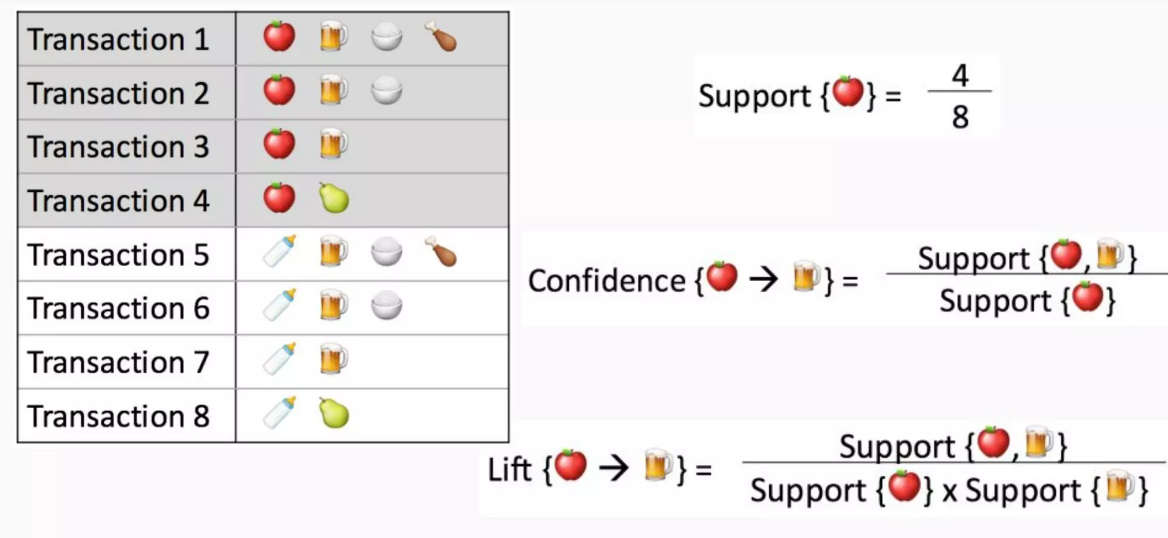

In [46]:
from IPython import display
display.Image("1.png", width=500)